# TF2로 MNIST 학습

* 은닉층 사용
* Dropout

In [13]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import tensorflow_addons as tfa

In [2]:
# train parameter

NB_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2

EPOCHS = 30
BATCH_SIZE = 512
N_HIDDEN = 128
DROPOUT=0.3

# 데이터 준비

In [3]:
# load mnist data set 
# split between train and test
# one-hot label
mnist = keras.datasets.mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()    # as numpy

# 
RESHAPED = 784 # 28x28
X_train = X_train.reshape(60000,RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32')
X_test =  X_test.astype('float32')

# normalize in [0,1]
X_train, X_test = X_train / 255.0, X_test / 255.0
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# one-hot 
Y_train = tf.keras.utils.to_categorical(Y_train, NB_CLASSES)   # numpy
Y_test = tf.keras.utils.to_categorical(Y_test, NB_CLASSES)

60000 train samples
10000 test samples


# 모델 준비

* 기본(regular)
* Weight normalization 적용 (WN)
* Batch normalization 적용(BN)

In [15]:
regular_model = keras.Sequential(
    [
        keras.Input(shape=(RESHAPED,)),  # 입력을 알려줘야 빌드됨 
        keras.layers.Dense(N_HIDDEN, name = 'dense_layer', activation='relu'),
        keras.layers.Dropout(DROPOUT),
        keras.layers.Dense(N_HIDDEN, name = 'dense_layer_2', activation='relu'),
        keras.layers.Dropout(DROPOUT),
        keras.layers.Dense(NB_CLASSES, name = 'dense_layer_3', activation='softmax')
    ]
)

regular_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_layer (Dense)          (None, 128)               100480    
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_layer_2 (Dense)        (None, 128)               16512     
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_layer_3 (Dense)        (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [18]:
wn_model = keras.Sequential(   # weight normalization 적용
    [
        keras.Input(shape=(RESHAPED,)),  # 입력을 알려줘야 빌드됨 
        tfa.layers.WeightNormalization(keras.layers.Dense(N_HIDDEN, name = 'dense_layer', activation='relu')),
        keras.layers.Dropout(DROPOUT),
        tfa.layers.WeightNormalization(keras.layers.Dense(N_HIDDEN, name = 'dense_layer_2', activation='relu')),
        keras.layers.Dropout(DROPOUT),
        tfa.layers.WeightNormalization(keras.layers.Dense(NB_CLASSES, name = 'dense_layer_3', activation='softmax'))
    ]
)

wn_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
weight_normalization_4 (Weig (None, 128)               201089    
_________________________________________________________________
dropout_10 (Dropout)         (None, 128)               0         
_________________________________________________________________
weight_normalization_5 (Weig (None, 128)               33153     
_________________________________________________________________
dropout_11 (Dropout)         (None, 128)               0         
_________________________________________________________________
weight_normalization_6 (Weig (None, 10)                2591      
Total params: 236,833
Trainable params: 118,548
Non-trainable params: 118,285
_________________________________________________________________


In [29]:
bn_model = keras.Sequential(   # weight normalization 적용
    [
        keras.Input(shape=(RESHAPED,)),  # 입력을 알려줘야 빌드됨 
        keras.layers.Dense(N_HIDDEN, name = 'dense_layer', activation='relu'),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(DROPOUT),
        keras.layers.Dense(N_HIDDEN, name = 'dense_layer_2', activation='relu'),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(DROPOUT),
        keras.layers.Dense(NB_CLASSES, name = 'dense_layer_3', activation='softmax')
    ]
)

bn_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_layer (Dense)          (None, 128)               100480    
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
dropout_14 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_layer_2 (Dense)        (None, 128)               16512     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512       
_________________________________________________________________
dropout_15 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_layer_3 (Dense)        (None, 10)               

# 모델 학습

In [20]:
# compile
optimizer =  tf.keras.optimizers.Adam(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    name='Adam')

regular_model.compile(optimizer=optimizer,
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy'])

# training 
regular_history = regular_model.fit(X_train, Y_train, 
    batch_size=BATCH_SIZE, epochs=EPOCHS,
    verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

Epoch 1/30
94/94 [==============================] - 0s 3ms/step - loss: 0.8200 - accuracy: 0.7442 - val_loss: 0.2636 - val_accuracy: 0.9231
Epoch 2/30
94/94 [==============================] - 0s 2ms/step - loss: 0.3215 - accuracy: 0.9063 - val_loss: 0.1926 - val_accuracy: 0.9434
Epoch 3/30
94/94 [==============================] - 0s 2ms/step - loss: 0.2440 - accuracy: 0.9286 - val_loss: 0.1560 - val_accuracy: 0.9536
Epoch 4/30
94/94 [==============================] - 0s 2ms/step - loss: 0.2034 - accuracy: 0.9403 - val_loss: 0.1366 - val_accuracy: 0.9603
Epoch 5/30
94/94 [==============================] - 0s 2ms/step - loss: 0.1782 - accuracy: 0.9470 - val_loss: 0.1237 - val_accuracy: 0.9637
Epoch 6/30
94/94 [==============================] - 0s 2ms/step - loss: 0.1585 - accuracy: 0.9518 - val_loss: 0.1131 - val_accuracy: 0.9665
Epoch 7/30
94/94 [==============================] - 0s 2ms/step - loss: 0.1431 - accuracy: 0.9570 - val_loss: 0.1081 - val_accuracy: 0.9677
Epoch 8/30
94/94 [==

In [21]:
wn_model.compile(optimizer=optimizer,
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy'])

# training 
wn_history = wn_model.fit(X_train, Y_train, 
    batch_size=BATCH_SIZE, epochs=EPOCHS,
    verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

Epoch 1/30
94/94 [==============================] - 0s 5ms/step - loss: 0.4463 - accuracy: 0.8589 - val_loss: 0.1605 - val_accuracy: 0.9500
Epoch 2/30
94/94 [==============================] - 0s 3ms/step - loss: 0.2165 - accuracy: 0.9355 - val_loss: 0.1297 - val_accuracy: 0.9620
Epoch 3/30
94/94 [==============================] - 0s 3ms/step - loss: 0.1762 - accuracy: 0.9467 - val_loss: 0.1166 - val_accuracy: 0.9653
Epoch 4/30
94/94 [==============================] - 0s 3ms/step - loss: 0.1520 - accuracy: 0.9547 - val_loss: 0.1075 - val_accuracy: 0.9682
Epoch 5/30
94/94 [==============================] - 0s 3ms/step - loss: 0.1357 - accuracy: 0.9578 - val_loss: 0.1016 - val_accuracy: 0.9695
Epoch 6/30
94/94 [==============================] - 0s 3ms/step - loss: 0.1251 - accuracy: 0.9621 - val_loss: 0.0979 - val_accuracy: 0.9697
Epoch 7/30
94/94 [==============================] - 0s 3ms/step - loss: 0.1136 - accuracy: 0.9653 - val_loss: 0.0959 - val_accuracy: 0.9723
Epoch 8/30
94/94 [==

In [30]:
bn_model.compile(optimizer=optimizer,
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy'])

# training 
bn_history = bn_model.fit(X_train, Y_train, 
    batch_size=BATCH_SIZE, epochs=EPOCHS,
    verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

Epoch 1/30
94/94 [==============================] - 0s 4ms/step - loss: 0.4028 - accuracy: 0.8789 - val_loss: 0.1847 - val_accuracy: 0.9508
Epoch 2/30
94/94 [==============================] - 0s 3ms/step - loss: 0.1956 - accuracy: 0.9408 - val_loss: 0.1380 - val_accuracy: 0.9603
Epoch 3/30
94/94 [==============================] - 0s 3ms/step - loss: 0.1577 - accuracy: 0.9521 - val_loss: 0.1112 - val_accuracy: 0.9684
Epoch 4/30
94/94 [==============================] - 0s 3ms/step - loss: 0.1368 - accuracy: 0.9582 - val_loss: 0.0994 - val_accuracy: 0.9706
Epoch 5/30
94/94 [==============================] - 0s 3ms/step - loss: 0.1166 - accuracy: 0.9637 - val_loss: 0.0944 - val_accuracy: 0.9731
Epoch 6/30
94/94 [==============================] - 0s 3ms/step - loss: 0.1095 - accuracy: 0.9655 - val_loss: 0.0929 - val_accuracy: 0.9732
Epoch 7/30
94/94 [==============================] - 0s 3ms/step - loss: 0.0970 - accuracy: 0.9690 - val_loss: 0.0891 - val_accuracy: 0.9737
Epoch 8/30
94/94 [==

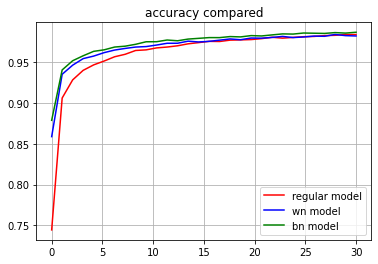

In [31]:
from matplotlib import pyplot as plt

regular_accuracy = regular_history.history['accuracy']
wn_accuracy = wn_history.history['accuracy']
bn_accuracy = bn_history.history['accuracy']

plt.plot(np.linspace(0, EPOCHS,  EPOCHS), regular_accuracy,
             color='red', label='regular model')

plt.plot(np.linspace(0, EPOCHS,  EPOCHS), wn_accuracy,
             color='blue', label='wn model')

plt.plot(np.linspace(0, EPOCHS,  EPOCHS), bn_accuracy,
             color='green', label='bn model')

plt.title('accuracy compared')
plt.legend()
plt.grid(True)
plt.show()


# 모델 평가 

In [11]:
#evalute the model
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 336us/step - loss: 0.0717 - accuracy: 0.9801
Test accuracy: 0.9800999760627747


# 모델 예측

In [12]:
# making prediction
predictions = model.predict(X_test)
predictions

array([[1.2289303e-09, 1.2075066e-07, 2.1008518e-07, ..., 9.9999297e-01,
        1.1052681e-09, 1.1281139e-07],
       [1.3749761e-08, 2.5073407e-04, 9.9974924e-01, ..., 9.9878417e-10,
        8.9288223e-11, 4.6429230e-15],
       [7.0792731e-07, 9.9977547e-01, 6.9993498e-06, ..., 1.9148357e-04,
        4.3056575e-06, 4.2570349e-07],
       ...,
       [8.6896584e-12, 5.2712300e-11, 3.6869934e-11, ..., 7.1952471e-08,
        7.5203371e-10, 1.2808688e-07],
       [4.7417598e-10, 1.3492335e-09, 1.3095071e-12, ..., 1.2870738e-10,
        2.0976486e-07, 1.5592043e-11],
       [8.8251717e-08, 4.9591663e-12, 1.2974511e-09, ..., 7.4735770e-14,
        2.3958766e-10, 7.0889379e-12]], dtype=float32)